In [4]:
import glob
import re
import matplotlib.pyplot as plt
import os

# Path to result folder
result_folder = 'result'
files = glob.glob(os.path.join(result_folder, 'temp_res_*.txt'))

# Data structure: data[dataset] = {'results': [(temp, auprc, fpr), ...], 'baseline': (auprc, fpr)}
data = {}

print(f"Found {len(files)} result files.")

for file_path in files:
    print(f"Processing {file_path}...")
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if not line:
            i += 1
            continue
            
        # Expecting blocks of 3 lines
        # Line 1: Model
        model_line = line
        if i + 1 >= len(lines): 
            i += 1
            break
        
        dataset_line = lines[i+1].strip()
        if i + 2 >= len(lines): 
            i += 2
            break
            
        result_line = lines[i+2].strip()
        
        i += 3 # Move to next block, or at least try to advance
        
        # Parse Dataset
        # format: Validation_Dataset\FS_LostFound_full\images\*.png
        # We want 'FS_LostFound_full'
        dataset_match = re.search(r'Validation_Dataset[\\/]([^\\/]+)[\\/]', dataset_line)
        if not dataset_match:
            # Try specific case if regex fails or different format
            print(f"Warning: Could not extract dataset from line: {dataset_line}")
            continue
        dataset = dataset_match.group(1)
        
        if dataset not in data:
            data[dataset] = {'results': [], 'baseline': None}
            
        # Parse Metrics for MSP
        # [MSP] AUPRC score:25.397872677315263   FPR@95TPR:14.629279450154648
        metrics_match = re.search(r'\[MSP\] AUPRC score:(\d+\.?\d*)\s+FPR@95TPR:(\d+\.?\d*)', result_line)
        if metrics_match:
            auprc = float(metrics_match.group(1))
            fpr = float(metrics_match.group(2))
        else:
            print(f"Warning: Could not extract metrics from line: {result_line}")
            continue

        # Parse Temperature / Baseline
        # format: .\trained_eomt\temperature=0.01-epoch=20.ckpt
        # or: trained_eomt/eomt_cityscapes.bin
        
        if 'eomt_cityscapes.bin' in model_line:
            data[dataset]['baseline'] = (auprc, fpr)
        else:
            temp_match = re.search(r'temperature=(\d+\.?\d*)', model_line)
            if temp_match:
                temp = float(temp_match.group(1))
                data[dataset]['results'].append((temp, auprc, fpr))
            else:
                 print(f"Warning: Could not extract temperature from model line: {model_line}")


Found 5 result files.
Processing result\temp_res_FS_LostFound_full.txt...
Processing result\temp_res_fs_static.txt...
Processing result\temp_res_RoadAnomaly.txt...
Processing result\temp_res_RoadAnomaly21.txt...
Processing result\temp_res_RoadObsticle21.txt...


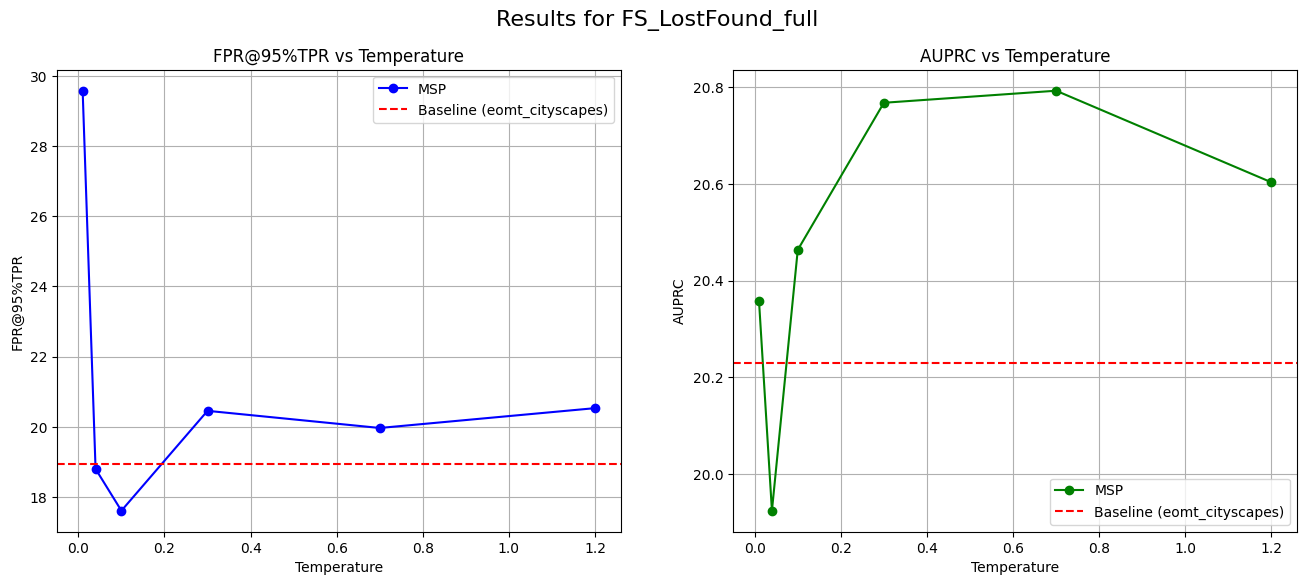

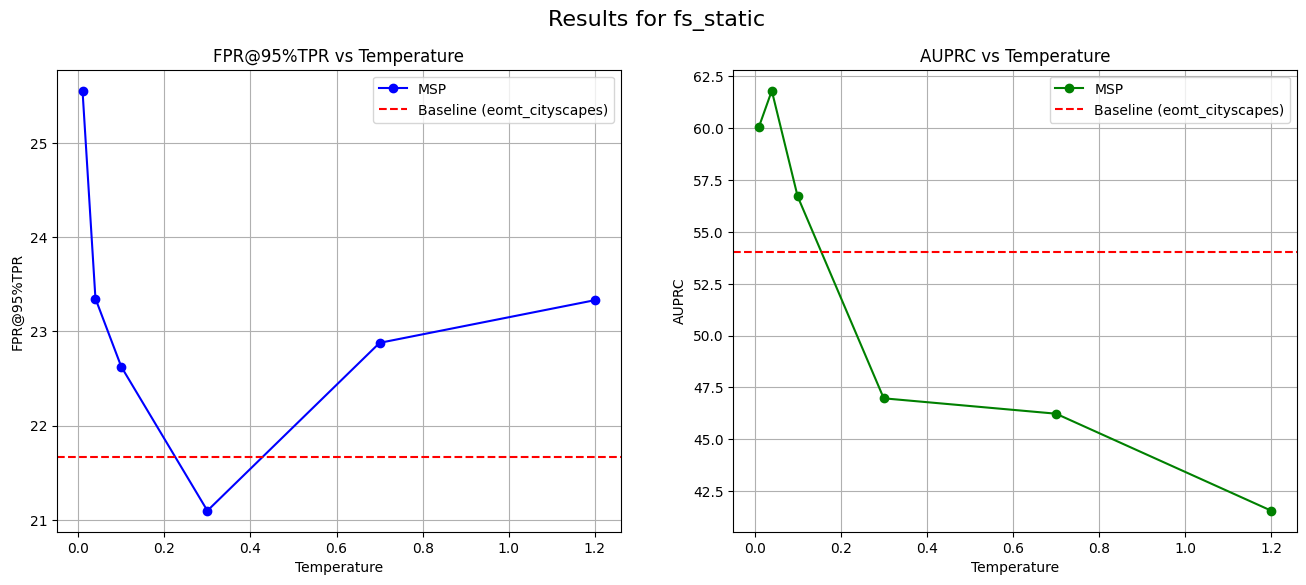

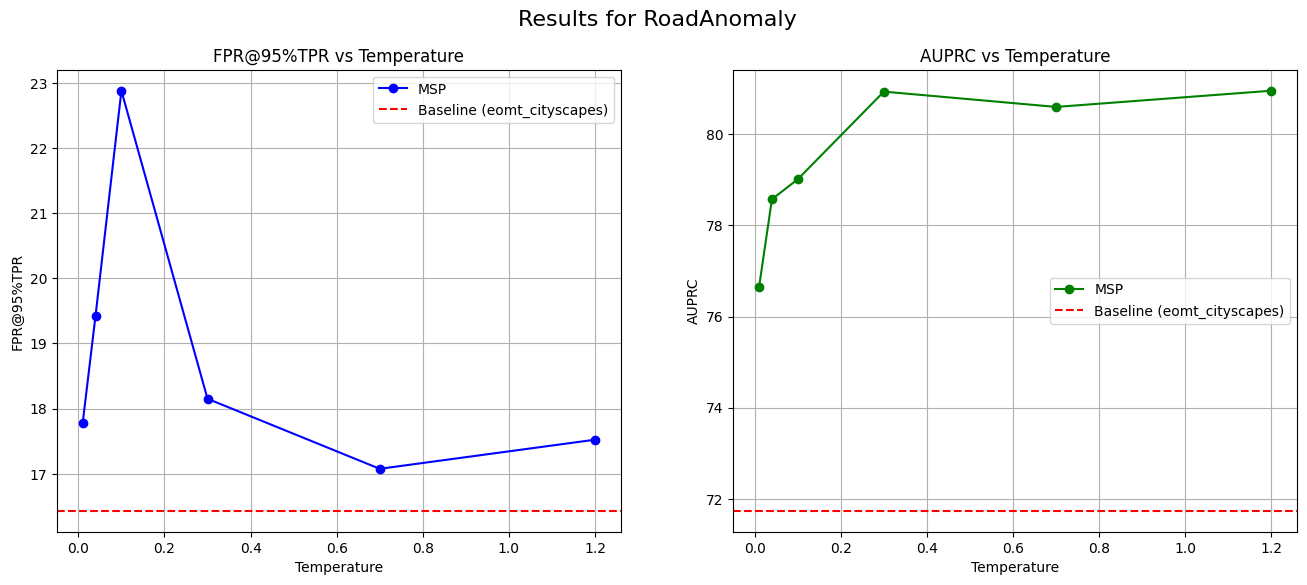

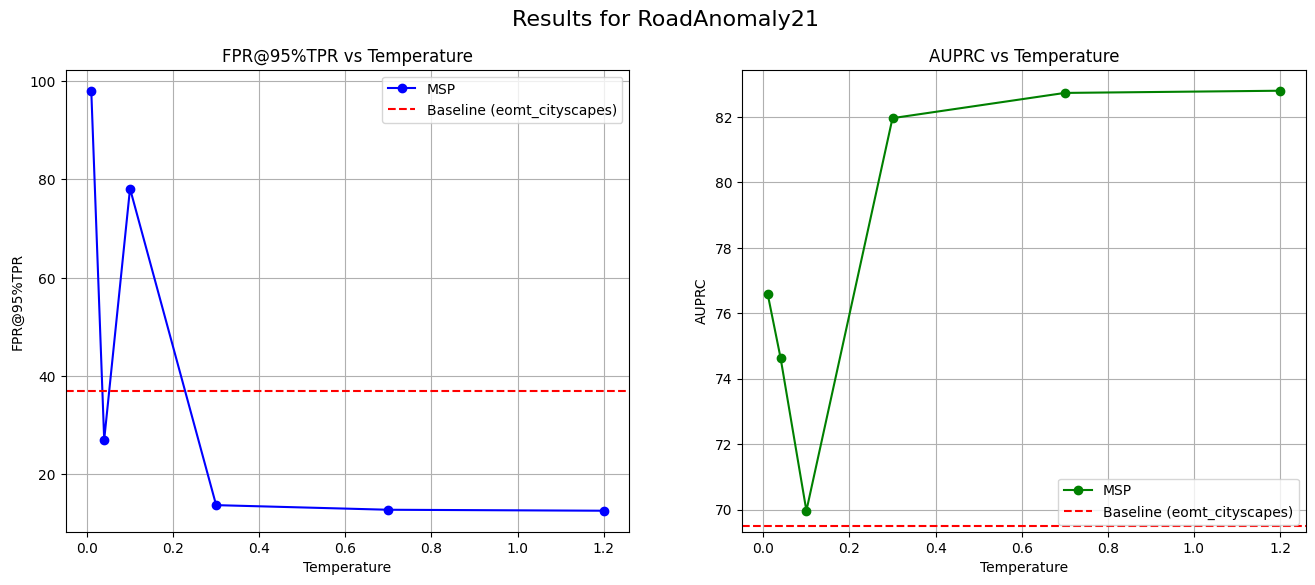

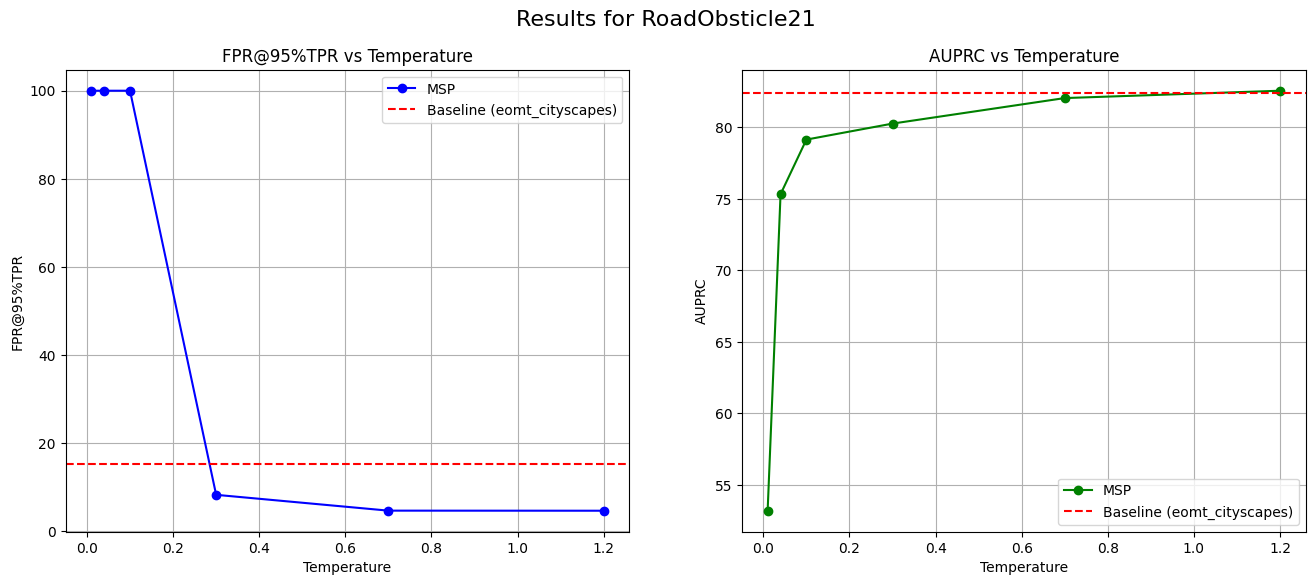

In [5]:
# Plotting
for dataset, content in data.items():
    results = content['results']
    baseline = content['baseline']
    
    if not results and not baseline:
        print(f"No data for {dataset}")
        continue

    # Sort by temperature
    results.sort(key=lambda x: x[0])
    
    temps = [x[0] for x in results]
    auprcs = [x[1] for x in results]
    fprs = [x[2] for x in results]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    plt.suptitle(f'Results for {dataset}', fontsize=16)
    
    # Plot FPR
    ax1.plot(temps, fprs, marker='o', label='MSP', color='blue')
    ax1.set_xlabel('Temperature')
    ax1.set_ylabel('FPR@95%TPR')
    ax1.set_title('FPR@95%TPR vs Temperature')
    ax1.grid(True)
    
    if baseline:
        ax1.axhline(y=baseline[1], color='r', linestyle='--', label='Baseline (eomt_cityscapes)')
        ax1.legend()
        
    # Plot AUPRC
    ax2.plot(temps, auprcs, marker='o', label='MSP', color='green')
    ax2.set_xlabel('Temperature')
    ax2.set_ylabel('AUPRC')
    ax2.set_title('AUPRC vs Temperature')
    ax2.grid(True)

    if baseline:
        ax2.axhline(y=baseline[0], color='r', linestyle='--', label='Baseline (eomt_cityscapes)')
        ax2.legend()
    
    plt.show()

# Experiment 1: Standard Resolution


In [4]:
import glob
import re
import matplotlib.pyplot as plt
import os

# Path to result folder
result_folder = 'result-1024x1024'
files = glob.glob(os.path.join(result_folder, 'temp_res_*.txt'))

# Data structure: data[dataset] = {'results': [(temp, auprc, fpr), ...], 'baseline': (auprc, fpr)}
data = {}

print(f"Found {len(files)} result files.")

for file_path in files:
    print(f"Processing {file_path}...")
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if not line:
            i += 1
            continue
            
        # Expecting blocks of 3 lines
        # Line 1: Model
        model_line = line
        if i + 1 >= len(lines): 
            i += 1
            break
        
        dataset_line = lines[i+1].strip()
        if i + 2 >= len(lines): 
            i += 2
            break
            
        result_line = lines[i+2].strip()
        
        i += 3 # Move to next block, or at least try to advance
        
        # Parse Dataset
        # format: Validation_Dataset\FS_LostFound_full\images\*.png
        # We want 'FS_LostFound_full'
        dataset_match = re.search(r'Validation_Dataset[\\/]([^\\/]+)[\\/]', dataset_line)
        if not dataset_match:
            # Try specific case if regex fails or different format
            print(f"Warning: Could not extract dataset from line: {dataset_line}")
            continue
        dataset = dataset_match.group(1)
        
        if dataset not in data:
            data[dataset] = {'results': [], 'baseline': None}
            
        # Parse Metrics for MSP
        # [MSP] AUPRC score:25.397872677315263   FPR@95TPR:14.629279450154648
        metrics_match = re.search(r'\[MSP\] AUPRC score:(\d+\.?\d*)\s+FPR@95TPR:(\d+\.?\d*)', result_line)
        if metrics_match:
            auprc = float(metrics_match.group(1))
            fpr = float(metrics_match.group(2))
        else:
            print(f"Warning: Could not extract metrics from line: {result_line}")
            continue

        # Parse Temperature / Baseline
        # format: .\trained_eomt\temperature=0.01-epoch=20.ckpt
        # or: trained_eomt/eomt_cityscapes.bin
        
        if 'eomt_cityscapes.bin' in model_line:
            data[dataset]['baseline'] = (auprc, fpr)
        else:
            temp_match = re.search(r't=(\d+\.?\d*)', model_line)
            if temp_match:
                temp = float(temp_match.group(1))
                data[dataset]['results'].append((temp, auprc, fpr))
            else:
                 print(f"Warning: Could not extract temperature from model line: {model_line}")


Found 5 result files.
Processing result-1024x1024\temp_res_FS_LostFound_full.txt...
Processing result-1024x1024\temp_res_fs_static.txt...
Processing result-1024x1024\temp_res_RoadAnomaly.txt...
Processing result-1024x1024\temp_res_RoadAnomaly21.txt...
Processing result-1024x1024\temp_res_RoadObsticle21.txt...


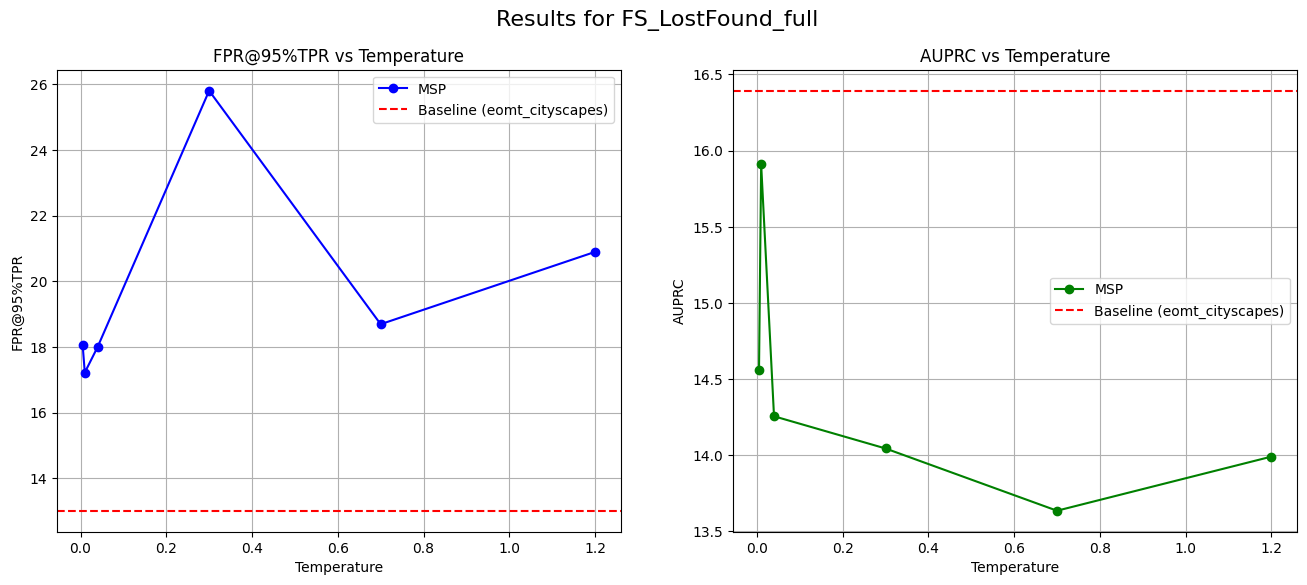

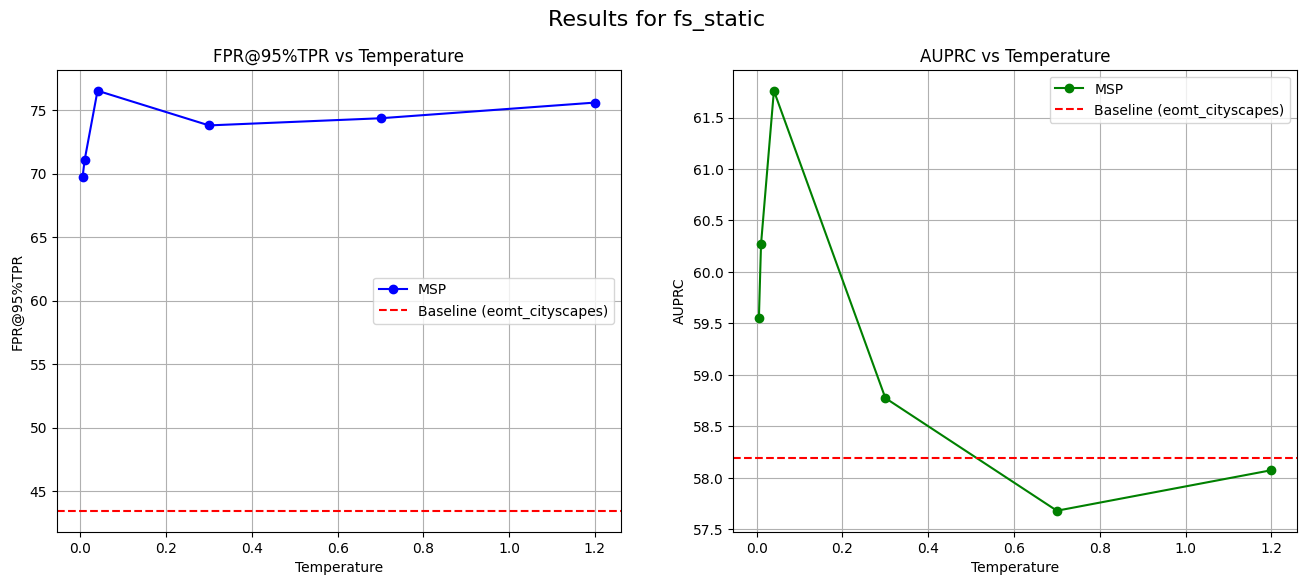

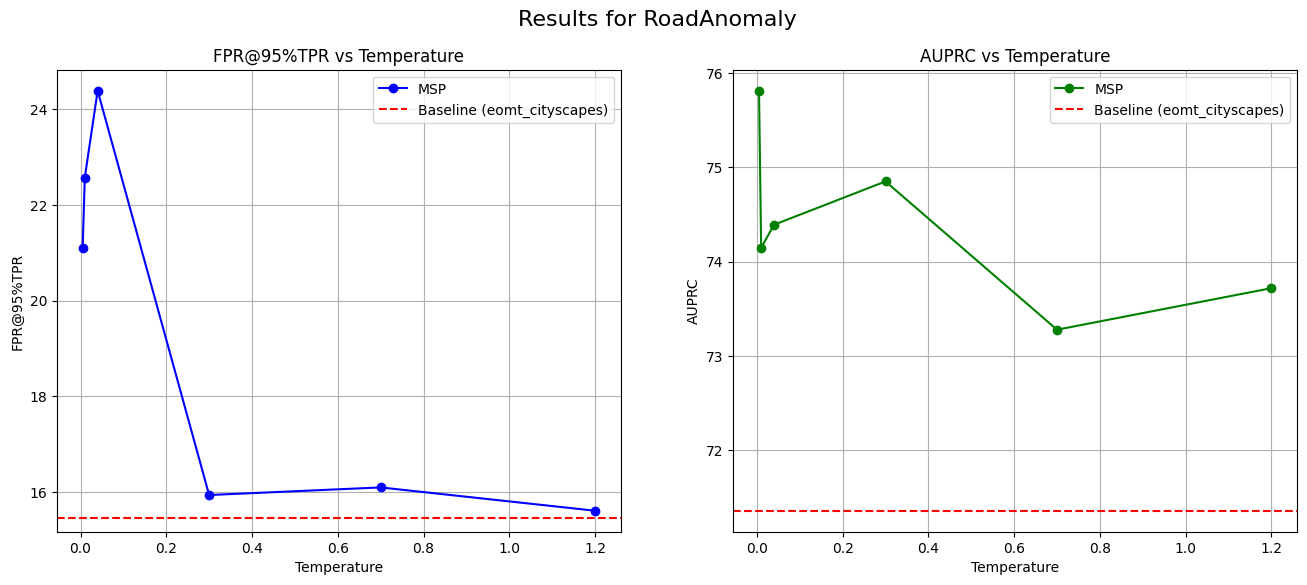

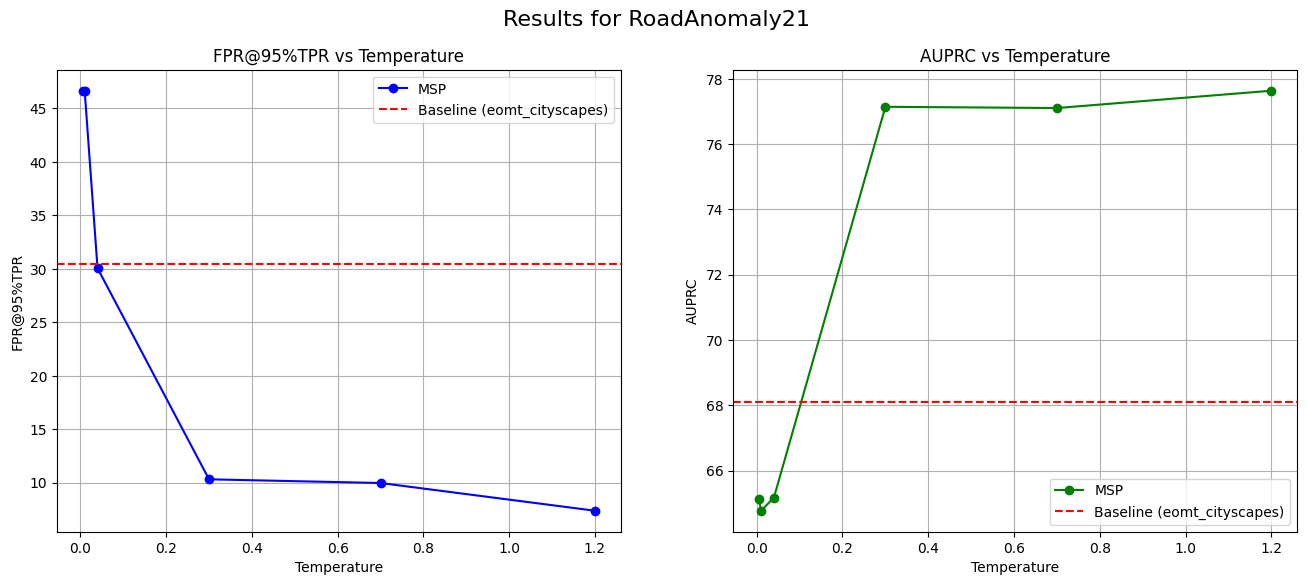

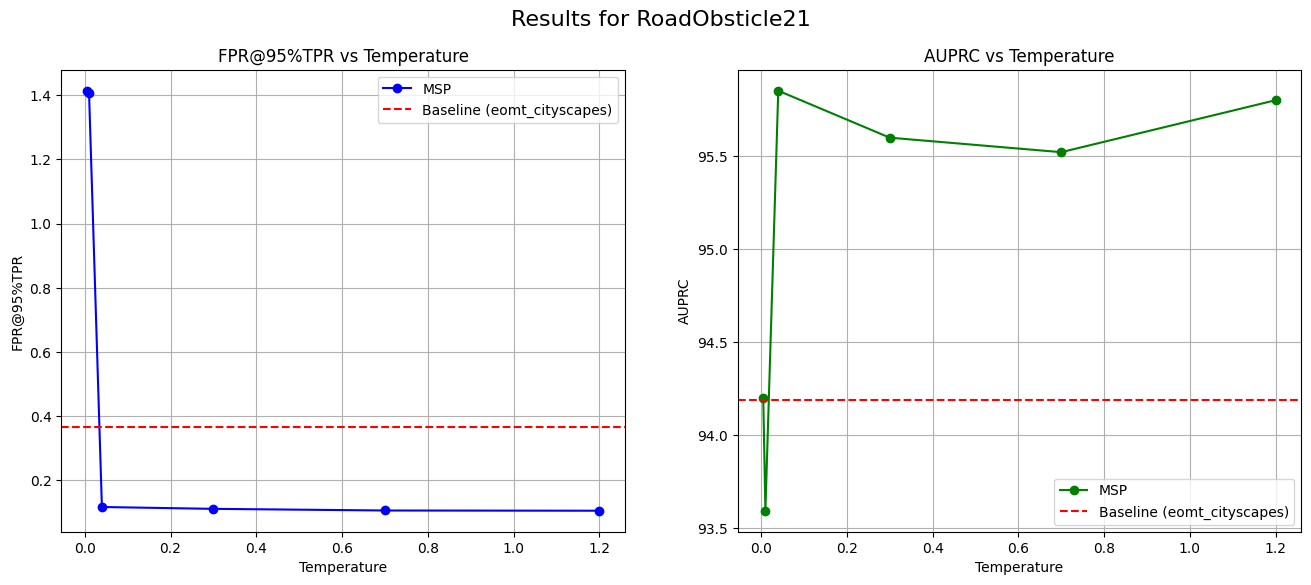

In [5]:
# Plotting
for dataset, content in data.items():
    results = content['results']
    baseline = content['baseline']
    
    if not results and not baseline:
        print(f"No data for {dataset}")
        continue

    # Sort by temperature
    results.sort(key=lambda x: x[0])
    
    temps = [x[0] for x in results]
    auprcs = [x[1] for x in results]
    fprs = [x[2] for x in results]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    plt.suptitle(f'Results for {dataset}', fontsize=16)
    
    # Plot FPR
    ax1.plot(temps, fprs, marker='o', label='MSP', color='blue')
    ax1.set_xlabel('Temperature')
    ax1.set_ylabel('FPR@95%TPR')
    ax1.set_title('FPR@95%TPR vs Temperature')
    ax1.grid(True)
    
    if baseline:
        ax1.axhline(y=baseline[1], color='r', linestyle='--', label='Baseline (eomt_cityscapes)')
        ax1.legend()
        
    # Plot AUPRC
    ax2.plot(temps, auprcs, marker='o', label='MSP', color='green')
    ax2.set_xlabel('Temperature')
    ax2.set_ylabel('AUPRC')
    ax2.set_title('AUPRC vs Temperature')
    ax2.grid(True)

    if baseline:
        ax2.axhline(y=baseline[0], color='r', linestyle='--', label='Baseline (eomt_cityscapes)')
        ax2.legend()
    
    plt.show()

# Experiment 2: Upscale Resolution


In [1]:
import glob
import re
import matplotlib.pyplot as plt
import os

# Path to result folder
result_folder = 'result-1024x1024-upscale'
files = glob.glob(os.path.join(result_folder, 'temp_res_*.txt'))

# Data structure: data[dataset] = {'results': [(temp, auprc, fpr), ...], 'baseline': (auprc, fpr)}
data = {}

print(f"Found {len(files)} result files.")

for file_path in files:
    print(f"Processing {file_path}...")
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if not line:
            i += 1
            continue
            
        # Expecting blocks of 3 lines
        # Line 1: Model
        model_line = line
        if i + 1 >= len(lines): 
            i += 1
            break
        
        dataset_line = lines[i+1].strip()
        if i + 2 >= len(lines): 
            i += 2
            break
            
        result_line = lines[i+2].strip()
        
        i += 3 # Move to next block, or at least try to advance
        
        # Parse Dataset
        # format: Validation_Dataset\FS_LostFound_full\images\*.png
        # We want 'FS_LostFound_full'
        dataset_match = re.search(r'Validation_Dataset[\\/]([^\\/]+)[\\/]', dataset_line)
        if not dataset_match:
            # Try specific case if regex fails or different format
            print(f"Warning: Could not extract dataset from line: {dataset_line}")
            continue
        dataset = dataset_match.group(1)
        
        if dataset not in data:
            data[dataset] = {'results': [], 'baseline': None}
            
        # Parse Metrics for MSP
        # [MSP] AUPRC score:25.397872677315263   FPR@95TPR:14.629279450154648
        metrics_match = re.search(r'\[MSP\] AUPRC score:(\d+\.?\d*)\s+FPR@95TPR:(\d+\.?\d*)', result_line)
        if metrics_match:
            auprc = float(metrics_match.group(1))
            fpr = float(metrics_match.group(2))
        else:
            print(f"Warning: Could not extract metrics from line: {result_line}")
            continue

        # Parse Temperature / Baseline
        # format: .\trained_eomt\temperature=0.01-epoch=20.ckpt
        # or: trained_eomt/eomt_cityscapes.bin
        
        if 'eomt_cityscapes.bin' in model_line:
            data[dataset]['baseline'] = (auprc, fpr)
        else:
            temp_match = re.search(r't=(\d+\.?\d*)', model_line)
            if temp_match:
                temp = float(temp_match.group(1))
                data[dataset]['results'].append((temp, auprc, fpr))
            else:
                 print(f"Warning: Could not extract temperature from model line: {model_line}")


Found 5 result files.
Processing result-1024x1024-upscale\temp_res_FS_LostFound_full.txt...
Processing result-1024x1024-upscale\temp_res_fs_static.txt...
Processing result-1024x1024-upscale\temp_res_RoadAnomaly.txt...
Processing result-1024x1024-upscale\temp_res_RoadAnomaly21.txt...
Processing result-1024x1024-upscale\temp_res_RoadObsticle21.txt...


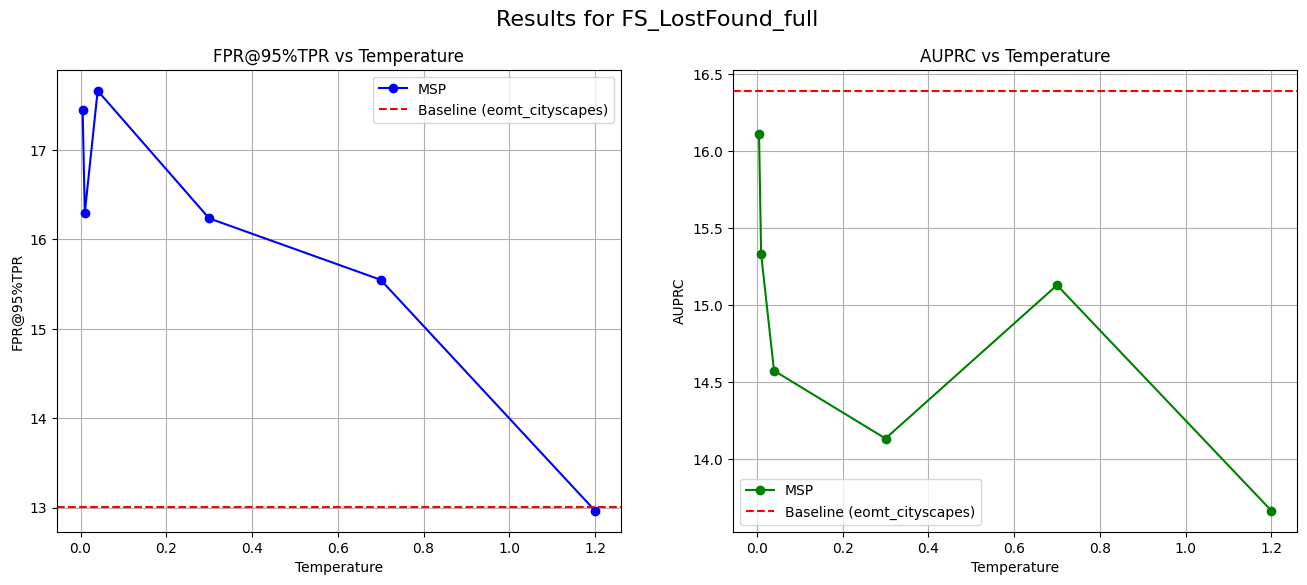

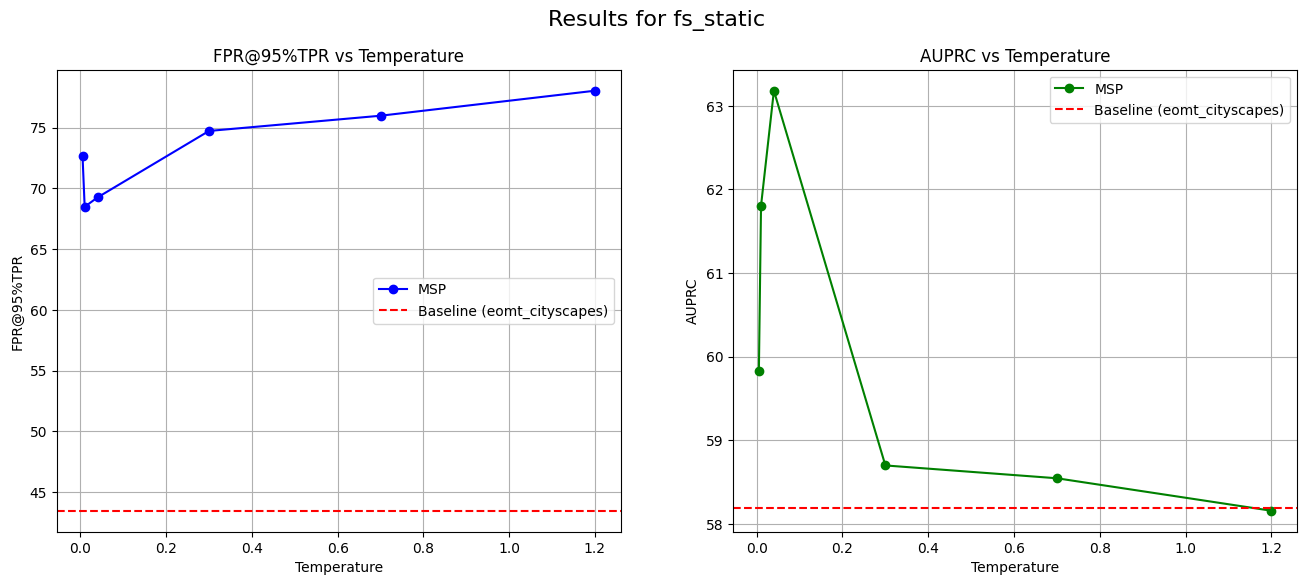

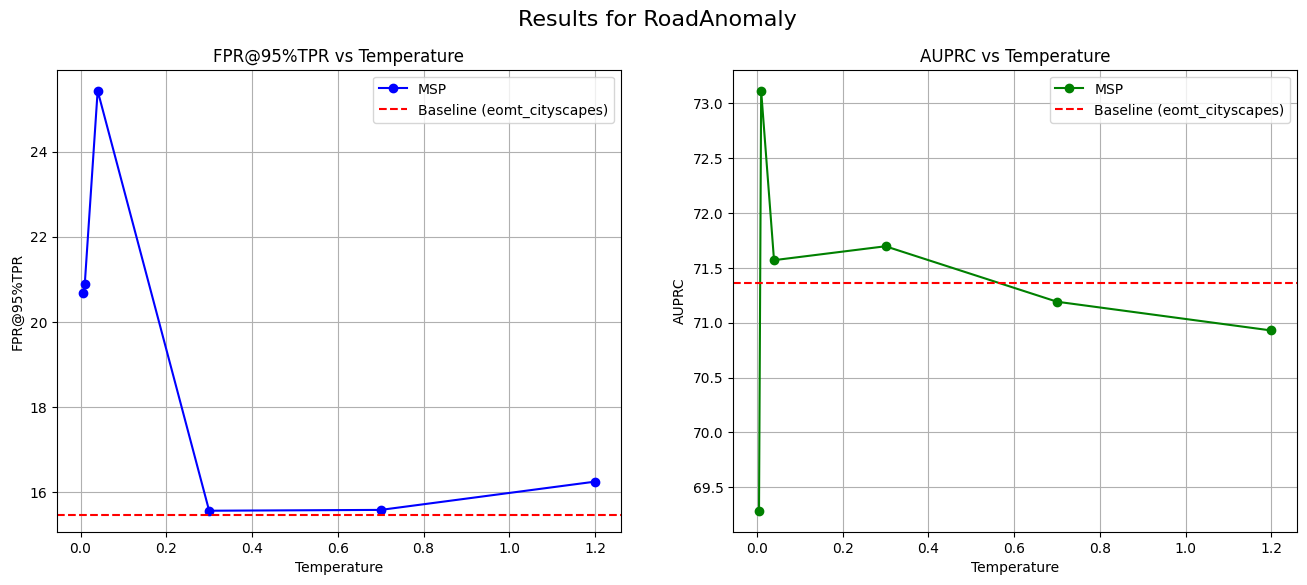

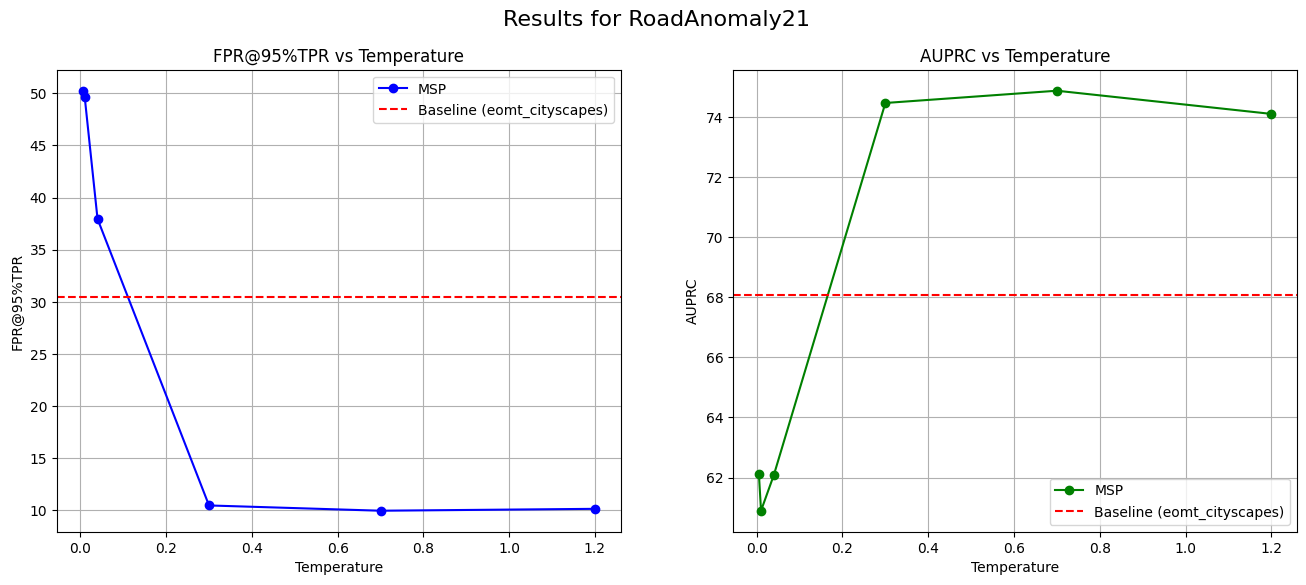

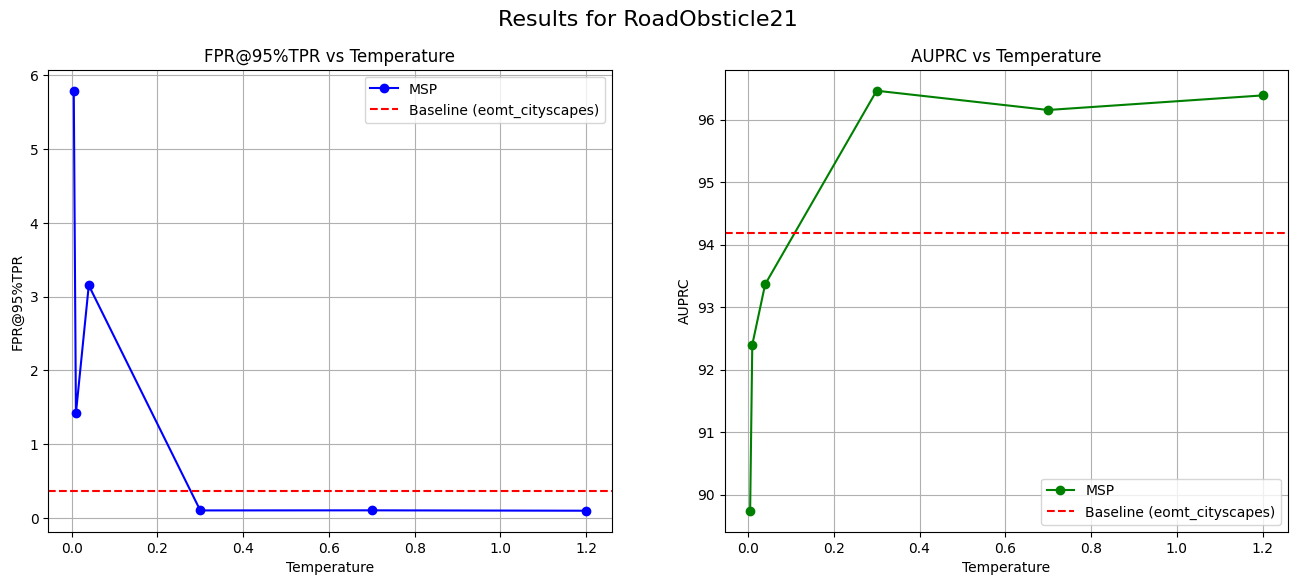

In [4]:
# Plotting
for dataset, content in data.items():
    results = content['results']
    baseline = content['baseline']
    
    if not results and not baseline:
        print(f"No data for {dataset}")
        continue

    # Sort by temperature
    results.sort(key=lambda x: x[0])
    
    temps = [x[0] for x in results]
    auprcs = [x[1] for x in results]
    fprs = [x[2] for x in results]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    plt.suptitle(f'Results for {dataset}', fontsize=16)
    
    # Plot FPR
    ax1.plot(temps, fprs, marker='o', label='MSP', color='blue')
    ax1.set_xlabel('Temperature')
    ax1.set_ylabel('FPR@95%TPR')
    ax1.set_title('FPR@95%TPR vs Temperature')
    ax1.grid(True)
    
    if baseline:
        ax1.axhline(y=baseline[1], color='r', linestyle='--', label='Baseline (eomt_cityscapes)')
        ax1.legend()
        
    # Plot AUPRC
    ax2.plot(temps, auprcs, marker='o', label='MSP', color='green')
    ax2.set_xlabel('Temperature')
    ax2.set_ylabel('AUPRC')
    ax2.set_title('AUPRC vs Temperature')
    ax2.grid(True)

    if baseline:
        ax2.axhline(y=baseline[0], color='r', linestyle='--', label='Baseline (eomt_cityscapes)')
        ax2.legend()

    plt.savefig(f'plots/{dataset}_results.png')
    plt.show()
    